In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.html.widgets import interact # Only works for IPython < 3.x.x. For 4.x.x or above, refer to https://github.com/ipython/ipywidgets
import h5py
import tensorflow as tf

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
sess = tf.Session(config=tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth=True)))

In [3]:
sess = tf.InteractiveSession()

In [32]:
np.random.random_integers(30)

19

In [72]:
n_class     = 10
label_table = np.empty([n_class, 3], dtype = 'int64')
label_table.fill(-1)
label_table[:,0] = np.arange(10)

for i in xrange(label_table.shape[0]):
    for j in xrange(label_table.shape[-1]-1):
#    label_table[:, i] = (10*i) + np.arange(10)
        label_table[i, j+1] = (10*(j+1)) + i

print label_table[:,0]
np.random.shuffle(label_table[:,1])
np.random.shuffle(label_table[:,2])
print label_table

[0 1 2 3 4 5 6 7 8 9]
[[ 0 18 21]
 [ 1 15 25]
 [ 2 12 27]
 [ 3 11 26]
 [ 4 10 24]
 [ 5 17 28]
 [ 6 14 29]
 [ 7 16 23]
 [ 8 13 20]
 [ 9 19 22]]


In [99]:
var2 = tf.Variable(tf.random_uniform([100], minval=0, maxval=30, dtype=tf.int64))

sess.run(tf.initialize_all_variables())

In [95]:
var2_arr = var2.eval()
print var2_arr
print np.unique(var2_arr)

[ 1  3 25 11 27 26 28 21  7 27 13 17  7 23 14 19 16  5 10 10 13 23  6 26  8
 25 18  3  1 13  8 29  7 25  6  7  6 16  6 16  6 28  2 10  1  9  9 25 18 26
 24  4 10 17  4 19 13 20  1  2 19  5 24 26 24  4  6  1  7 10 11 29  6 20 23
 16 26  6 10  8  7 16 28 23 12  0 13 27 24 13 28 10 12 28 20  4 26 27 14 12]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 23 24 25 26
 27 28 29]


In [96]:
# label chaining
empty = np.zeros(shape=(0, 2), dtype = 'int64')
temp_var = tf.Variable(empty, dtype=tf.int64)
for i in range(var2.get_shape()[0]):
    temp_var = tf.concat(0, [temp_var, tf.where(tf.equal(label_table, var2[i,0]))])
    #temp_var = tf.where(tf.equal(label_table, var2[i,0]))
    #var2 = tf.scatter_update(var2, i, temp_var[0,0])
#print temp_var.eval()
#print var2.eval()
var2 = tf.assign(var2, temp_var[:,0])
print var2.eval()

[1 3 1 3 2 3 5 0 7 2 8 5 7 7 6 9 7 5 4 4 8 7 6 3 8 1 0 3 1 8 8 6 7 1 6 7 6
 7 6 7 6 5 2 4 1 9 9 1 0 3 4 4 4 5 4 9 8 8 1 2 9 5 4 3 4 4 6 1 7 4 3 6 6 8
 7 7 3 6 4 8 7 7 5 7 2 0 8 2 4 8 5 4 2 5 8 4 3 2 6 2]


In [104]:
print var2.get_shape
#print temp_var.eval()
#print temp_var[0,0].eval()

<bound method Variable.get_shape of <tensorflow.python.ops.variables.Variable object at 0x7f9bad470d90>>


In [44]:
np.arange(10,20)

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [42]:
empty_list = np.empty([0,0])
print empty_list
for i in range(10):
    empty_list = np.append(empty_list, np.ones((10,2))*i)
#print np.sqrt(empty_list.shape[0])
print empty_list.reshape((100,2))


[]
[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  1.]
 [ 2.  2.]
 [ 2.  2.]
 [ 2.  2.]
 [ 2.  2.]
 [ 2.  2.]
 [ 2.  2.]
 [ 2.  2.]
 [ 2.  2.]
 [ 2.  2.]
 [ 2.  2.]
 [ 3.  3.]
 [ 3.  3.]
 [ 3.  3.]
 [ 3.  3.]
 [ 3.  3.]
 [ 3.  3.]
 [ 3.  3.]
 [ 3.  3.]
 [ 3.  3.]
 [ 3.  3.]
 [ 4.  4.]
 [ 4.  4.]
 [ 4.  4.]
 [ 4.  4.]
 [ 4.  4.]
 [ 4.  4.]
 [ 4.  4.]
 [ 4.  4.]
 [ 4.  4.]
 [ 4.  4.]
 [ 5.  5.]
 [ 5.  5.]
 [ 5.  5.]
 [ 5.  5.]
 [ 5.  5.]
 [ 5.  5.]
 [ 5.  5.]
 [ 5.  5.]
 [ 5.  5.]
 [ 5.  5.]
 [ 6.  6.]
 [ 6.  6.]
 [ 6.  6.]
 [ 6.  6.]
 [ 6.  6.]
 [ 6.  6.]
 [ 6.  6.]
 [ 6.  6.]
 [ 6.  6.]
 [ 6.  6.]
 [ 7.  7.]
 [ 7.  7.]
 [ 7.  7.]
 [ 7.  7.]
 [ 7.  7.]
 [ 7.  7.]
 [ 7.  7.]
 [ 7.  7.]
 [ 7.  7.]
 [ 7.  7.]
 [ 8.  8.]
 [ 8.  8.]
 [ 8.  8.]
 [ 8.  8.]
 [ 8.  8.]
 [ 8.  8.]
 [ 8.  8.]
 [ 8.  8.]
 [ 8.  8.]
 [ 8.  8.]
 [ 9.  

In [66]:
#var1 = tf.Variable(tf.truncated_normal([4,2], stddev=20))
#var2 = tf.Variable(tf.truncated_normal([4,1], stddev=40))


var = tf.constant(3)
var1 = tf.Variable(tf.random_uniform([10,2], minval=0, maxval=10, dtype=tf.int32))
var2 = tf.Variable(tf.random_uniform([10,1], minval=0, maxval=10, dtype=tf.int32))
#var3 = tf.equal(label_table, var2)
#var4 = tf.where(var3)
empty = np.zeros(shape=(0, 0) )
a = tf.Variable(empty)
##var2 = tf.assign(var2, var3, validate_shape=False)
sess.run(tf.initialize_all_variables())

In [6]:
temp = list([1,2,3,4,5,6,7,8,9])
print np.array(temp)[[1,3,7]]

[2 4 8]


In [101]:
var2 = tf.concat(1,[var1, var2])

In [150]:
print var1.eval()
print var2.eval()
print var3.eval()
print label_table
print var4.eval()

[[8 5]
 [2 2]
 [9 9]
 [2 4]
 [4 7]
 [7 5]
 [4 4]
 [4 6]
 [8 3]
 [2 5]]
[[7]
 [1]
 [5]
 [4]
 [4]
 [9]
 [5]
 [8]
 [3]
 [1]]
[[False False False False False False False False False False]
 [ True False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [ True False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]]
[[ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 2 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 3 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 4 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 5 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 6 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [ 7 -1 -1 -1 -1

In [36]:
temp = np.zeros([10])
temp_idx = np.array([1,3,5])

temp[temp_idx] = temp[temp_idx] + 2
print temp

[ 0.  2.  0.  2.  0.  2.  0.  0.  0.  0.]


In [2]:
num_puntos = 2000
conjunto_puntos = []
for i in xrange(num_puntos):
    if np.random.random() > 0.5:
        conjunto_puntos.append([np.random.normal(0.0, 0.9), np.random.normal(0.0, 0.9)])
    else:
        conjunto_puntos.append([np.random.normal(3.0, 0.7), np.random.normal(1.0, 0.5)])

In [3]:
temp = np.array(conjunto_puntos)

In [8]:
temp.shape

(2000, 2)

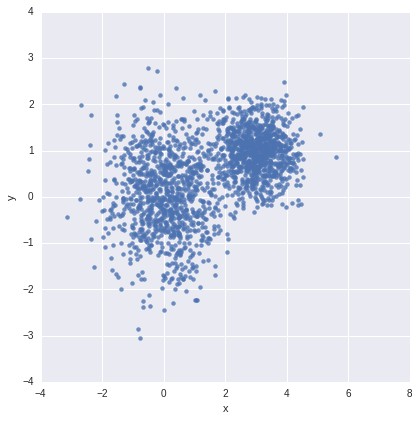

In [4]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame({"x": [v[0] for v in temp],
        "y": [v[1] for v in conjunto_puntos]})
sns.lmplot("x", "y", data=df, fit_reg=False, size=6)
plt.show()

In [6]:
vectors = tf.constant(temp)
k = 4
centroides = tf.Variable(tf.slice(tf.random_shuffle(vectors),[0,0],[k,-1]))

expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroides = tf.expand_dims(centroides, 1)

assignments = tf.argmin(tf.reduce_sum(tf.square(tf.sub(expanded_vectors, expanded_centroides)), 2), 0)

means = tf.concat(0, [tf.reduce_mean(tf.gather(vectors, tf.reshape(tf.where( tf.equal(assignments, c)),[1,-1])), reduction_indices=[1]) for c in xrange(k)])

update_centroides = tf.assign(centroides, means)

init_op = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init_op)

for step in xrange(100):
   _, centroid_values, assignment_values = sess.run([update_centroides, centroides, assignments])

In [5]:
assignment_values

array([0, 1, 1, ..., 0, 2, 0])

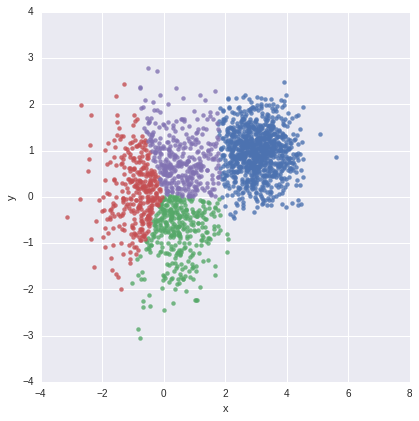

In [7]:
data = {"x": [], "y": [], "cluster": []}

for i in xrange(len(assignment_values)):
  data["x"].append(conjunto_puntos[i][0])
  data["y"].append(conjunto_puntos[i][1])
  data["cluster"].append(assignment_values[i])

df = pd.DataFrame(data)
sns.lmplot("x", "y", data=df, fit_reg=False, size=6, hue="cluster", legend=False)
plt.show()

In [8]:
data


{'cluster': [1,
  3,
  0,
  3,
  1,
  3,
  2,
  3,
  2,
  2,
  2,
  0,
  2,
  0,
  1,
  2,
  1,
  0,
  0,
  0,
  1,
  1,
  3,
  0,
  2,
  0,
  0,
  0,
  3,
  1,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  0,
  0,
  3,
  3,
  2,
  3,
  0,
  3,
  2,
  0,
  0,
  1,
  0,
  0,
  2,
  0,
  0,
  0,
  2,
  1,
  3,
  0,
  0,
  3,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  2,
  1,
  3,
  2,
  1,
  0,
  2,
  2,
  1,
  0,
  1,
  0,
  2,
  1,
  2,
  3,
  0,
  0,
  0,
  0,
  2,
  3,
  0,
  0,
  3,
  0,
  0,
  3,
  1,
  2,
  0,
  0,
  0,
  2,
  2,
  3,
  3,
  0,
  2,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  3,
  0,
  0,
  3,
  2,
  0,
  0,
  1,
  3,
  3,
  2,
  0,
  3,
  2,
  3,
  0,
  3,
  0,
  2,
  3,
  2,
  0,
  2,
  0,
  1,
  0,
  0,
  0,
  1,
  3,
  0,
  3,
  0,
  1,
  2,
  0,
  2,
  0,
  0,
  0,
  0,
  3,
  0,
  2,
  2,
  3,
  0,
  0,
  0,
  1,
  2,
  0,
  0,
  0,
  1,
  3,
  0,
  3,
  0,
  1,
  2,
  0,
  2,
  0,
  3,
  1,
  2,
  1,
  0,
  0,
  0,
  0,

In [12]:
'''
Code to calculate clusters using a Dirichlet Process
Gaussian mixture model. 

Requires scikit-learn:
  http://scikit-learn.org/stable/
'''

import numpy
from sklearn import mixture

FILENAME = "mcdonalds-normalized-data.tsv"

# Note: you'll have to remove the last "name" column in the file (or
# some other such thing), so that all the columns are numeric.
x = numpy.loadtxt(open(FILENAME, "rb"), delimiter = "\t", skiprows = 1)
dpgmm = mixture.DPGMM(n_components = 25)
dpgmm.fit(x)
clusters = dpgmm.predict(x)


ValueError: could not convert string to float: Hamburger

(10, 2)
[0 1]
[[ 2.9942681   0.98647929]
 [-0.05077752  0.01135024]]


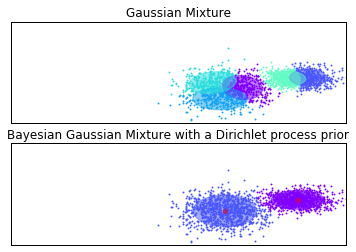

In [84]:
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from sklearn import mixture

#color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
#                              'darkorange'])
color_iter = cm.rainbow(np.linspace(0, 1, 10))

def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xlim(-9., 5.)
    plt.ylim(-3., 6.)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)

num_puntos = 2000
conjunto_puntos = []
for i in xrange(num_puntos):
    if np.random.random() > 0.5:
        conjunto_puntos.append([np.random.normal(0.0, 0.9), np.random.normal(0.0, 0.9)])
    else:
        conjunto_puntos.append([np.random.normal(3.0, 0.7), np.random.normal(1.0, 0.5)])
temp = np.array(conjunto_puntos)
# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]

# Fit a Gaussian mixture with EM using five components
gmm = mixture.GaussianMixture(n_components=5, covariance_type='full').fit(temp)
plot_results(temp, gmm.predict(temp), gmm.means_, gmm.covariances_, 0,
             'Gaussian Mixture')

# Fit a Dirichlet process Gaussian mixture using five components
dpgmm = mixture.BayesianGaussianMixture(
    n_components=10, covariance_type='full', weight_concentration_prior=1e-5,
    weight_concentration_prior_type='dirichlet_process',
    mean_precision_prior=1e-6, covariance_prior=1e+2 * np.eye(2),
    init_params="random", max_iter=100, random_state=2).fit(temp)
plot_results(temp, dpgmm.predict(temp), dpgmm.means_, dpgmm.covariances_, 1,
             'Bayesian Gaussian Mixture with a Dirichlet process prior')

print dpgmm.means_.shape
cluster_idx = np.unique(dpgmm.predict(temp))
cluster_means = dpgmm.means_[cluster_idx]
print cluster_idx
print dpgmm.means_[cluster_idx]

plt.scatter(cluster_means[:,0], cluster_means[:,1], color='red')
plt.show()
#plt.scatter(Y[indices][np.argmin(probs)][0], Y[indices][np.argmin(probs)][1], color='red')

In [72]:
cluster_means[:,0]

array([-0.31457213, -0.0258828 ,  3.02490432])

In [73]:
cluster_means

array([[-0.31457213,  0.71459123],
       [-0.0258828 , -0.04092284],
       [ 3.02490432,  0.99518131]])

In [97]:
temp = np.empty([5,10])
temp.fill(-1)

In [98]:
temp

array([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]])